# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [24]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)
    print('aaa')

#TODO Do samodzielnej implementacji

from ainvert import A_invert


def show_img(img,cmap:str,title:str=None):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(f'{title if title else ""}')
    plt.show()
    
    
def read_img(image_path):
    img = cv2.imread(image_path)           
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


def bicubic_interpolation(image, width_scale, height_scale):
    


    def calc_derivatives(i:int, j:int):
        i_0  = max(i - 1, 0)
        j_0 = max(j - 1, 0)

        i_2 = min(i + 1, img_height - 1)
        j_2 = min(j + 1, img_width - 1)

        Px = (image[i_2, j] - image[i_0, j]) / 2
        Py = (image[i, j_2] - image[i, j_0]) / 2
        Pxy = (image[i_2, j_2] - image[i_2, j_0] - image[i_0, j_2] + image[i_0, j_0]) / 4

        return Px, Py, Pxy


    def interpolate(a_vector, p_x: int, p_y: int):
        value = 0
        for i in range(4):
            for j in range(4):
                index = i * 4 + j 
                value += a_vector[index] * (p_x**i) * (p_y**j)
        return value



    image = image.astype(np.float32)
    
    img_height, img_width = image.shape

    scaled_img_height = int(img_height * height_scale)
    scaled_img_width = int(img_width * width_scale)

    scaled_img = np.zeros((scaled_img_height, scaled_img_width), dtype=np.uint8)


    for h in range(scaled_img_height):
        for w in range(scaled_img_width):

            i = h / height_scale
            j = w / width_scale

            i_1 = min(int(i),img_height-1)
            j_1 = min(int(j),img_width-1)

            i_2 = min(i_1 + 1, img_height - 1)
            j_2 = min(j_1 + 1, img_width - 1)

            A = image[i_1, j_1]
            B = image[i_2, j_1]
            C = image[i_2, j_2]
            D = image[i_1, j_2]

            Ax, Ay, Axy = calc_derivatives(i_1, j_1)
            Bx, By, Bxy = calc_derivatives(i_2, j_1)
            Cx, Cy, Cxy = calc_derivatives(i_2, j_2)
            Dx, Dy, Dxy =  calc_derivatives(i_1, j_2)

            x = np.array([A, B, C, D, Ax, Bx, Cx, Dx, Ay, By, Cy, Dy, Axy, Bxy, Cxy, Dxy])
            a  = A_invert @ x

            p_x = i - i_1
            p_y = j - j_1

            scaled_img[h, w] = np.clip(interpolate(a_vector=a, p_x=p_x, p_y=p_y), 0, 255)

    return  scaled_img
# +------------------------------+--------------------------------------------+----------------------------------------+
# |           Method             | Number of arithmetic operations per point  |    Number of memory access per point   |
# +------------------------------+--------------------------------------------+----------------------------------------+
# |    Bilinear interpolation    | 5                                          | 4                                      |
# |    Bicubic interpolation     | 37                                         | 20                                     |
# +------------------------------+--------------------------------------------+----------------------------------------+




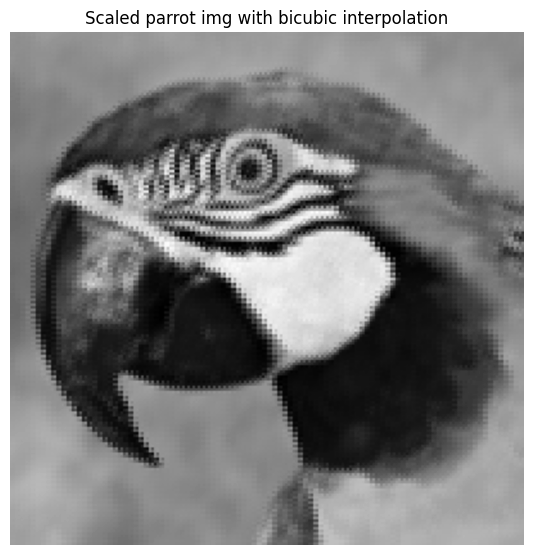

In [28]:
parrot_image = read_img('parrot.bmp')

scaled_img =  bicubic_interpolation(image=parrot_image, width_scale=2, height_scale=2)
show_img(scaled_img, cmap='gray', title='Scaled parrot img with bicubic interpolation')